# **DESCRIPTION**

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

    Store - the store number

    Date - the week of sales

    Weekly_Sales -  sales for the given store

    Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

    Temperature - Temperature on the day of sale

    Fuel_Price - Cost of fuel in the region

    CPI – Prevailing consumer price index

    Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Analysis Tasks

Basic Statistics tasks

    Which store has maximum sales

    Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

    Which store/s has good quarterly growth rate in Q3’2012

    Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

    Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build  prediction models to forecast demand

    Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

    Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **Read Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Walmart_Store_sales.csv')

In [ ]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# **Data Wrangling**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
data.shape

(6435, 8)

In [ ]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
data.Date = pd.to_datetime(data.Date)

In [ ]:
data.Holiday_Flag = data.Holiday_Flag.astype('category')

In [ ]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag          category
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [ ]:
data.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,100.140000,4.468000,227.232807,14.313000


In [ ]:
data.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [ ]:
len(list(data.Store.unique()))

45

In [ ]:
data.dropna(inplace = True)

# **Which store has maximum sales**

In [ ]:
df = data[['Store','Weekly_Sales']]
d = df.groupby('Store').sum()
d = d.reset_index()
d

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [ ]:
d[d['Weekly_Sales'] == d['Weekly_Sales'].max()]

,Store,Weekly_Sales
19,20,3.013978e+08


The store which has maximum sales is store number **20**

# **Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation**
Coefficient of Variation = (Standard Deviation / Mean) * 100.

In [ ]:
df = data[['Store','Weekly_Sales']]
df

,Store,Weekly_Sales
0,1,1643690.90
1,1,1641957.44
2,1,1611968.17
3,1,1409727.59
4,1,1554806.68
...,...,...
6430,45,713173.95
6431,45,733455.07
6432,45,734464.36
6433,45,718125.53


In [ ]:
std = df.groupby('Store').std()
std1 = std.reset_index()
std1

,Store,Weekly_Sales
0,1,155980.767761
1,2,237683.694682
2,3,46319.631557
3,4,266201.442297
4,5,37737.965745
5,6,212525.855862
6,7,112585.469220
7,8,106280.829881
8,9,69028.666585
9,10,302262.062504


In [ ]:
std1[std1['Weekly_Sales'] == std1['Weekly_Sales'].max()]

,Store,Weekly_Sales
13,14,317569.949476


Store **14** has the maximum Standard deviation


In [ ]:
mean = df.groupby('Store').mean()
mean

,Weekly_Sales
Store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05
6,1.564728e+06
7,5.706173e+05
8,9.087495e+05
9,5.439806e+05


In [ ]:
covariane_std_mean = (std / mean) * 100

In [ ]:
covariane_std_mean

,Weekly_Sales
Store,
1,10.029212
2,12.342388
3,11.502141
4,12.708254
5,11.866844
6,13.582286
7,19.730469
8,11.695283
9,12.689547


In [ ]:
covariane_std_mean.reset_index()
covariane_std_mean[covariane_std_mean['Weekly_Sales']< 10]

,Weekly_Sales
Store,
30,5.200804
31,9.016105
33,9.286835
37,4.208412
42,9.033533
43,6.410363
44,8.179331


These Stores has very good Coefficient

# **Which store/s has good quarterly growth rate in Q3’2012**

In [ ]:
data_Q3_2012 = data[(pd.to_datetime(data['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(data['Date']) <= pd.to_datetime('09-30-2012'))]
data_growth = data_Q3_2012.groupby(['Store'])['Weekly_Sales'].sum()
display(data_growth[data_growth == data_growth.max()])

Store
4    25652119.35
Name: Weekly_Sales, dtype: float64

Store number **4** has good quarterly growth rate in Q3’2012 With **25652119.35**

# **Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together**

In [ ]:
data_hd = data[data['Holiday_Flag'] == 1]
data_nhd = data[data['Holiday_Flag'] == 0]
data_hd

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424


In [ ]:
def holiday(date_):
    superbowl    = [pd.to_datetime('12-02-2010'),pd.to_datetime('11-02-2011'),pd.to_datetime('10-02-2012'),pd.to_datetime('08-02-2013')]
    labour       = [pd.to_datetime('10-09-2010'),pd.to_datetime('09-09-2011'),pd.to_datetime('07-09-2012'),pd.to_datetime('06-09-2013')]
    thanksgiving = [pd.to_datetime('26-11-2010'),pd.to_datetime('25-11-2011'),pd.to_datetime('23-11-2012'),pd.to_datetime('29-11-2013')]
    chrismas     = [pd.to_datetime('31-12-2010'),pd.to_datetime('30-12-2011'),pd.to_datetime('28-12-2012'),pd.to_datetime('27-12-2013')]
    
    if date_ in superbowl:
        return 'superbowl'
    if date_ in labour:
        return 'labour'
    if date_ in thanksgiving:
        return 'thanksgiving'
    if date_ in chrismas:
        return 'chrismas'
    return np.nan


In [ ]:
data_hd['Holiday'] = data_hd['Date'].apply(holiday)
data_hd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,superbowl
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,labour
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,thanksgiving
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,chrismas
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,superbowl
...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,labour
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,thanksgiving
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,chrismas
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,superbowl


In [ ]:
data_hd['Holiday'].value_counts()

superbowl       135
labour          135
thanksgiving     90
chrismas         90
Name: Holiday, dtype: int64

In [ ]:
mean_sales_in_non_holiday = data_nhd['Weekly_Sales'].mean()
mean_sales_in_non_holiday

1041256.3802088564

In [ ]:
data_hd_higher = data_hd[data_hd['Weekly_Sales'] > mean_sales_in_non_holiday]

In [ ]:
data_hd_higher

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,superbowl
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,labour
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,thanksgiving
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,chrismas
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,superbowl
...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,chrismas
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,superbowl
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,labour
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,thanksgiving


In [ ]:
data_hd_higher.groupby('Holiday').sum()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Holiday,,,,,,
chrismas,629,5.242778e+07,1372.10,111.732,6017.319623,280.231
labour,1190,9.433218e+07,4492.80,210.241,10331.806350,461.227
superbowl,1220,1.003758e+08,2235.21,198.216,10559.422892,521.604
thanksgiving,1309,1.157024e+08,2897.28,195.449,10187.794466,491.112


In [ ]:
data_hd_higher.groupby('Holiday').mean()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Holiday,,,,,,
chrismas,17.971429,1.497937e+06,39.202857,3.192343,171.923418,8.006600
labour,19.508197,1.546429e+06,73.652459,3.446574,169.373875,7.561098
superbowl,19.365079,1.593267e+06,35.479524,3.146286,167.609887,8.279429
thanksgiving,21.459016,1.896760e+06,47.496393,3.204082,167.013024,8.051016


In [ ]:
data_hd_higher.Holiday.max()

'thanksgiving'

**Thanksgiving** Holiday has the higher sales than the mean sales in non-holiday season for all stores together 

# **Provide a monthly and semester view of sales in units and give insights**

In [ ]:
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


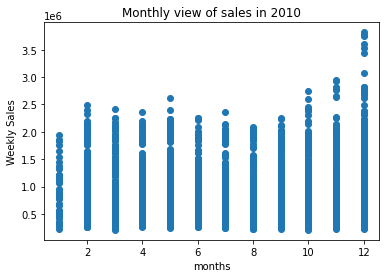

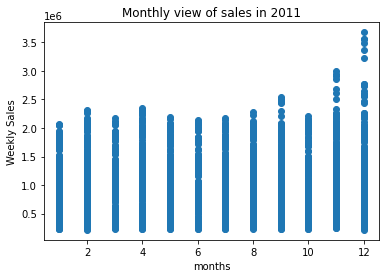

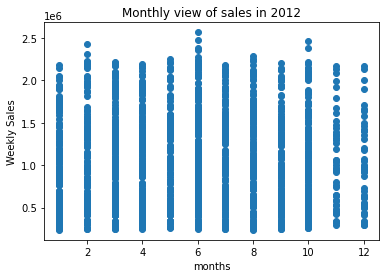

In [ ]:
# Monthly view of sales for each years
plt.scatter(data[data.Year==2010]["Month"],data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

Text(0.5, 1.0, 'Monthly view of sales')

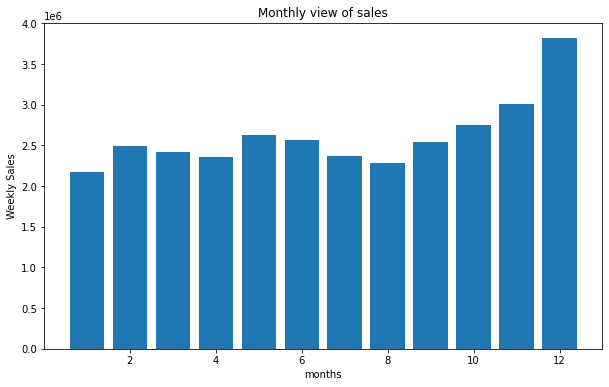

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(data["Month"],data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

Text(0.5, 1.0, 'Yearly view of sales')

<Figure size 720x432 with 0 Axes>

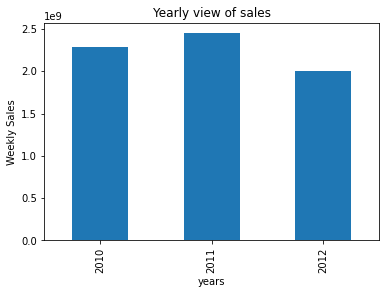

In [ ]:
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")

# **Statistical Model**

In [ ]:
store_1_data = data[data['Store'] == 1]
store_1_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,28,9,2012
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,10,5,2012
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,10,12,2012
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,19,10,2012


In [ ]:
x_features = store_1_data[['Store','Date','Fuel_Price','CPI','Unemployment']]
date_obj = store_1_data['Date']
date_obj.index +=1
x_features.Date = date_obj.index
x_features.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Store,Date,Fuel_Price,CPI,Unemployment
138,1,139,3.666,222.981658,6.908
139,1,140,3.617,223.181477,6.573
140,1,141,3.601,223.381296,6.573
141,1,142,3.594,223.425723,6.573
142,1,143,3.506,223.444251,6.573


In [ ]:
x_features.head()

,Store,Date,Fuel_Price,CPI,Unemployment
0,1,1,2.572,211.096358,8.106
1,1,2,2.548,211.242170,8.106
2,1,3,2.514,211.289143,8.106
3,1,4,2.561,211.319643,8.106
4,1,5,2.625,211.350143,8.106


In [ ]:
y_target = store_1_data['Weekly_Sales']
y_target.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [ ]:
x_features.shape

(143, 5)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_target,random_state=1)

## **Linear Regression**

In [ ]:
lg = LinearRegression()
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test , y_pred)))

Mean Absolute Error: 118128.62655637975
Mean Squared Error: 31407109486.89809
Root Mean Squared Error: 177220.51090914418


## **Random Forest Regressor**

In [ ]:
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=5, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=rfr.predict(x_test)

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test , y_pred)))

Mean Absolute Error: 111402.06906680537
Mean Squared Error: 27160083259.09503
Root Mean Squared Error: 164803.165197441


So the model **Random Forest Regressor** is better than model **Linear regression**

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-latex-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra texlive-pictures
  texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum ri
  ruby-dev bundle

In [ ]:
!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/Retail_Analysis_with_Walmart_Data.ipynb' --to pdf

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Retail_Analysis_with_Walmart_Data.ipynb to pdf
[NbConvertApp] Support files will be in Retail_Analysis_with_Walmart_Data_files/
[NbConvertApp] Making directory ./Retail_Analysis_with_Walmart_Data_files
[NbConvertApp] Making directory ./Retail_Analysis_with_Walmart_Data_files
[NbConvertApp] Making directory ./Retail_Analysis_with_Walmart_Data_files
[NbConvertApp] Making directory ./Retail_Analysis_with_Walmart_Data_files
[NbConvertApp] Making directory ./Retail_Analysis_with_Walmart_Data_files
[NbConvertApp] Writing 96419 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 120994 bytes to /content/drive/MyDrive/Colab No